In [4]:
!pip install pandas matplotlib seaborn scikit-learn

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot  as plt

In [6]:
df = pd.read_csv("dados/auto-mpg.csv")

df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
184,27.0,4,101.0,83,2202,15.3,76,2,renault 12tl
113,26.0,4,98.0,90,2265,15.5,73,2,fiat 124 sport coupe
34,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu
300,34.5,4,105.0,70,2150,14.9,79,1,plymouth horizon tc3
247,19.9,8,260.0,110,3365,15.5,78,1,oldsmobile cutlass salon brougham


In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

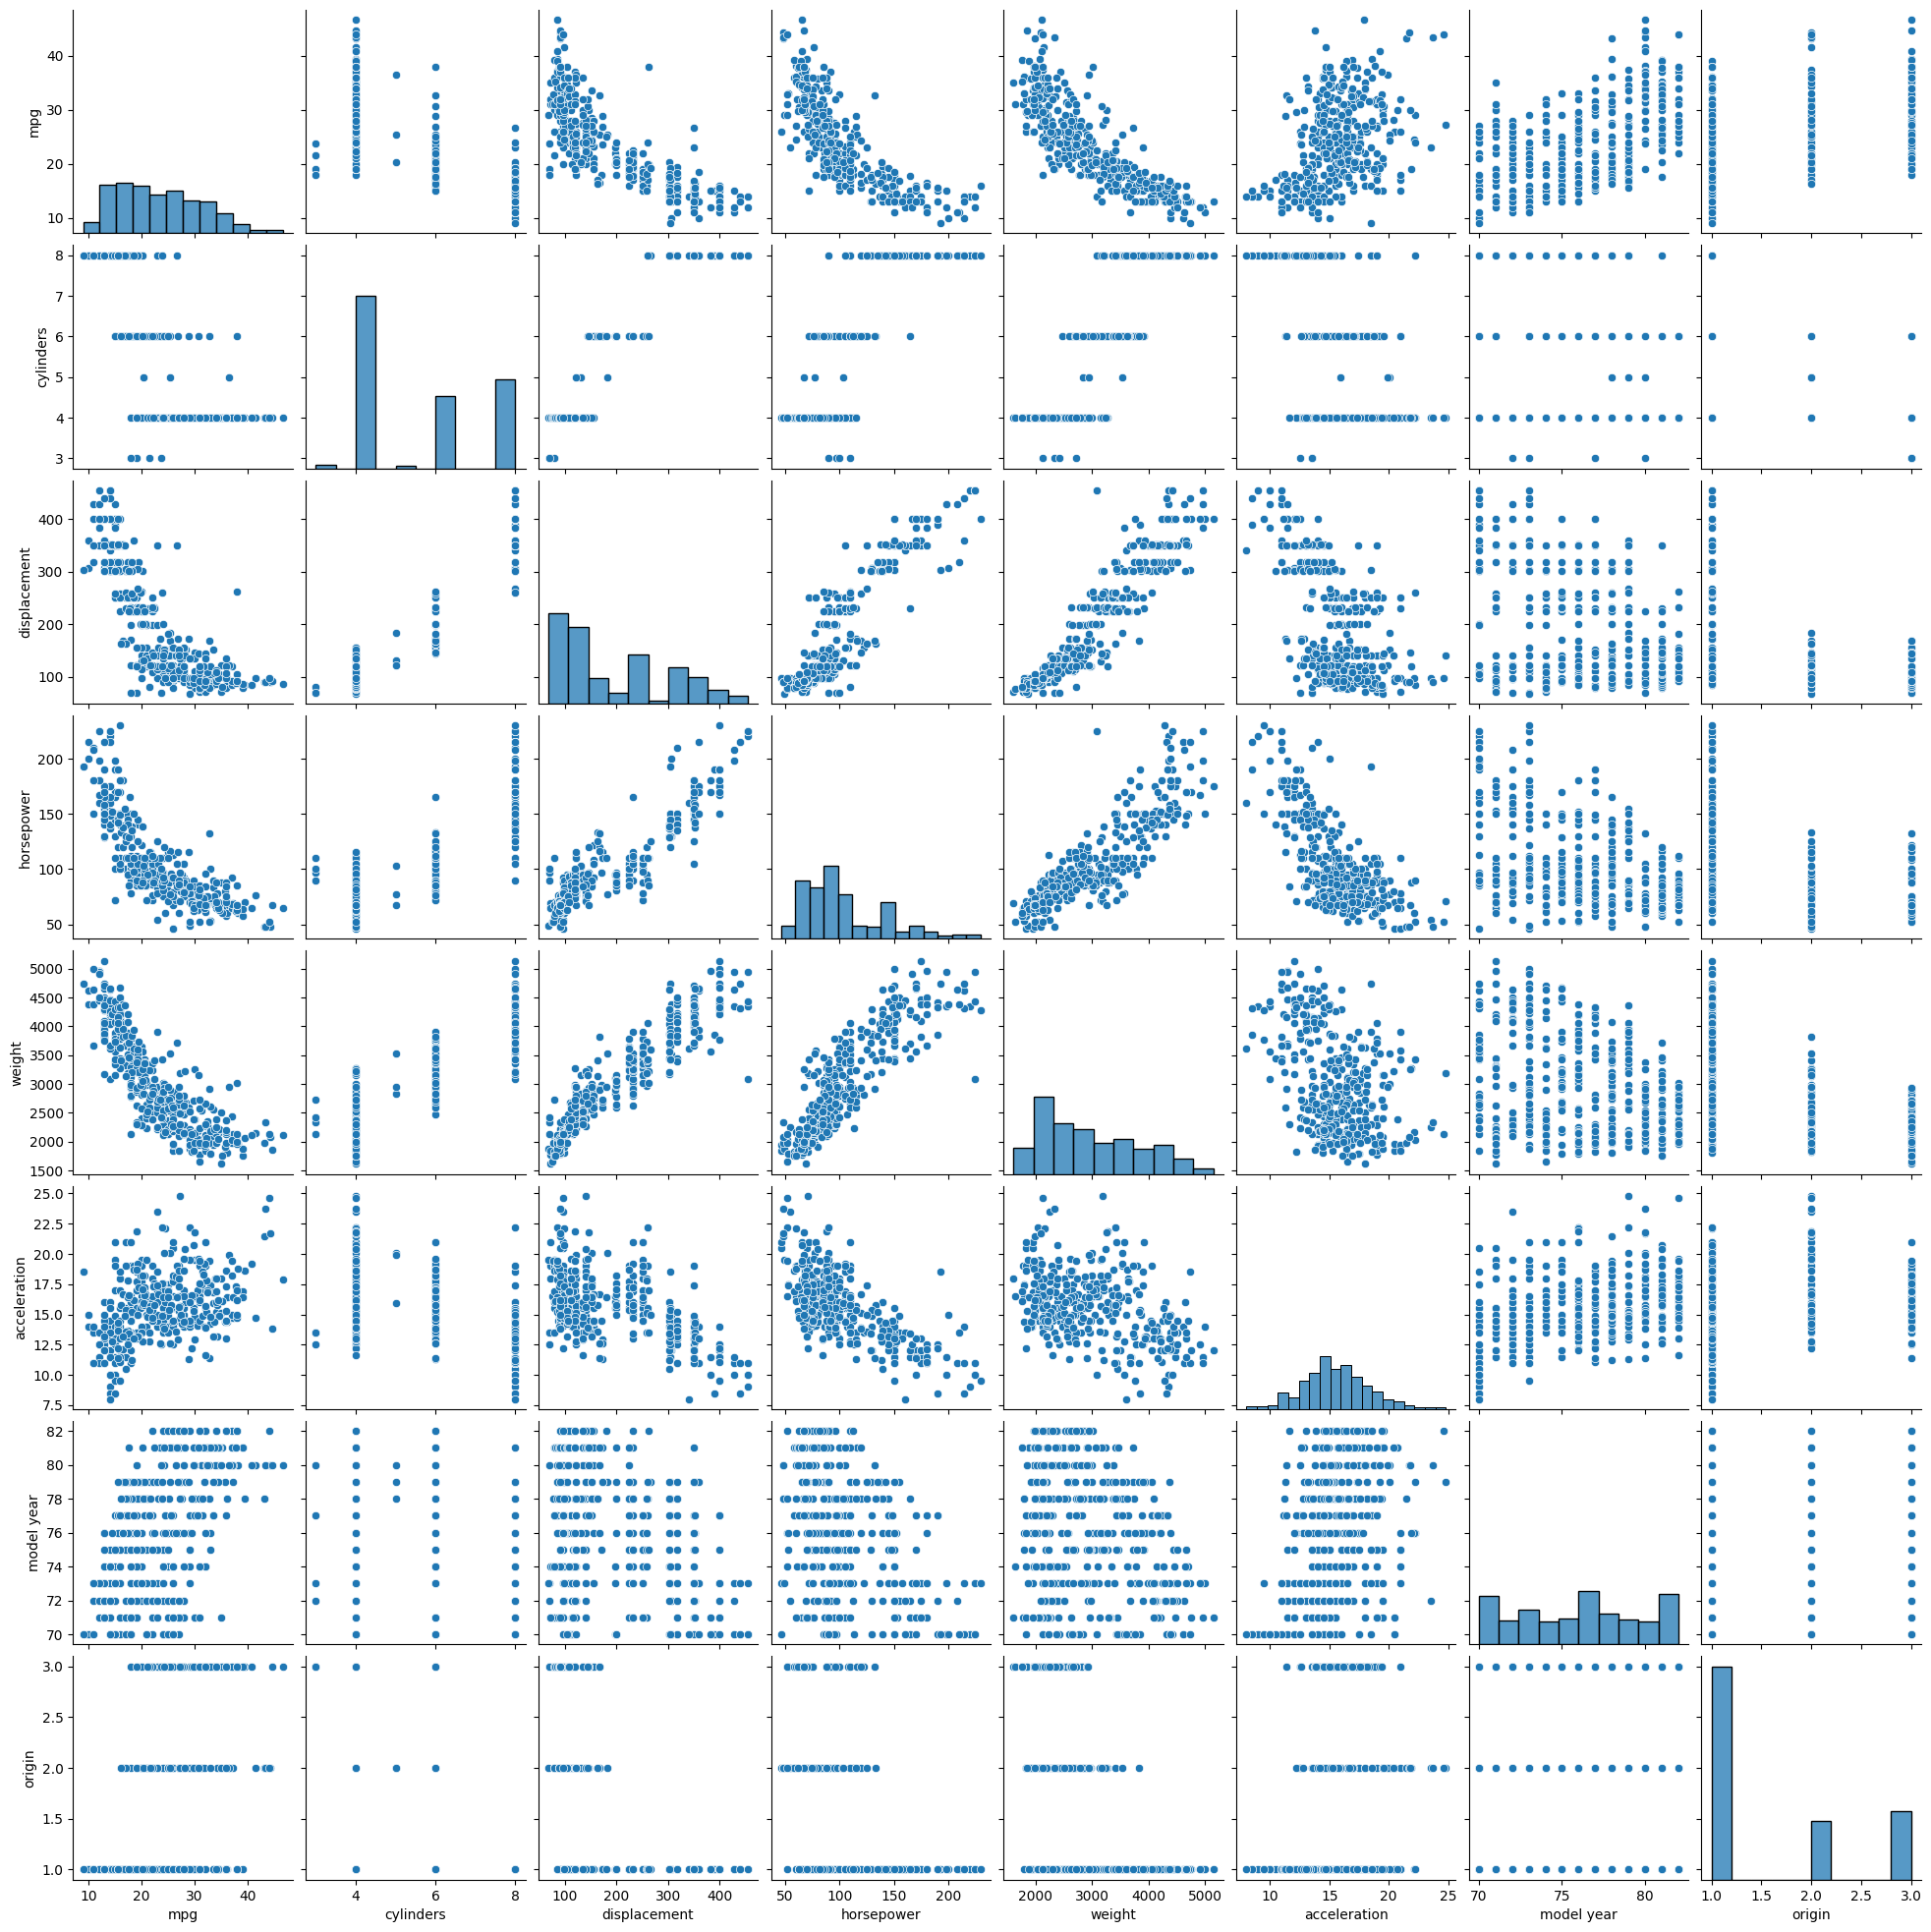

In [9]:
sns.pairplot(df)

<Axes: >

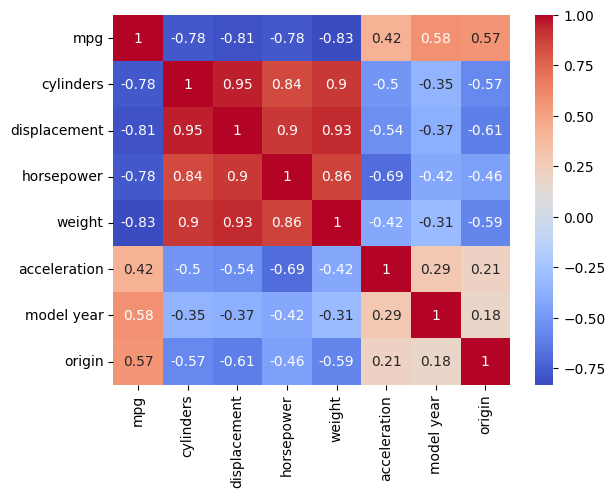

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot= True ,cmap="coolwarm")

corelação entre dados do veiculo

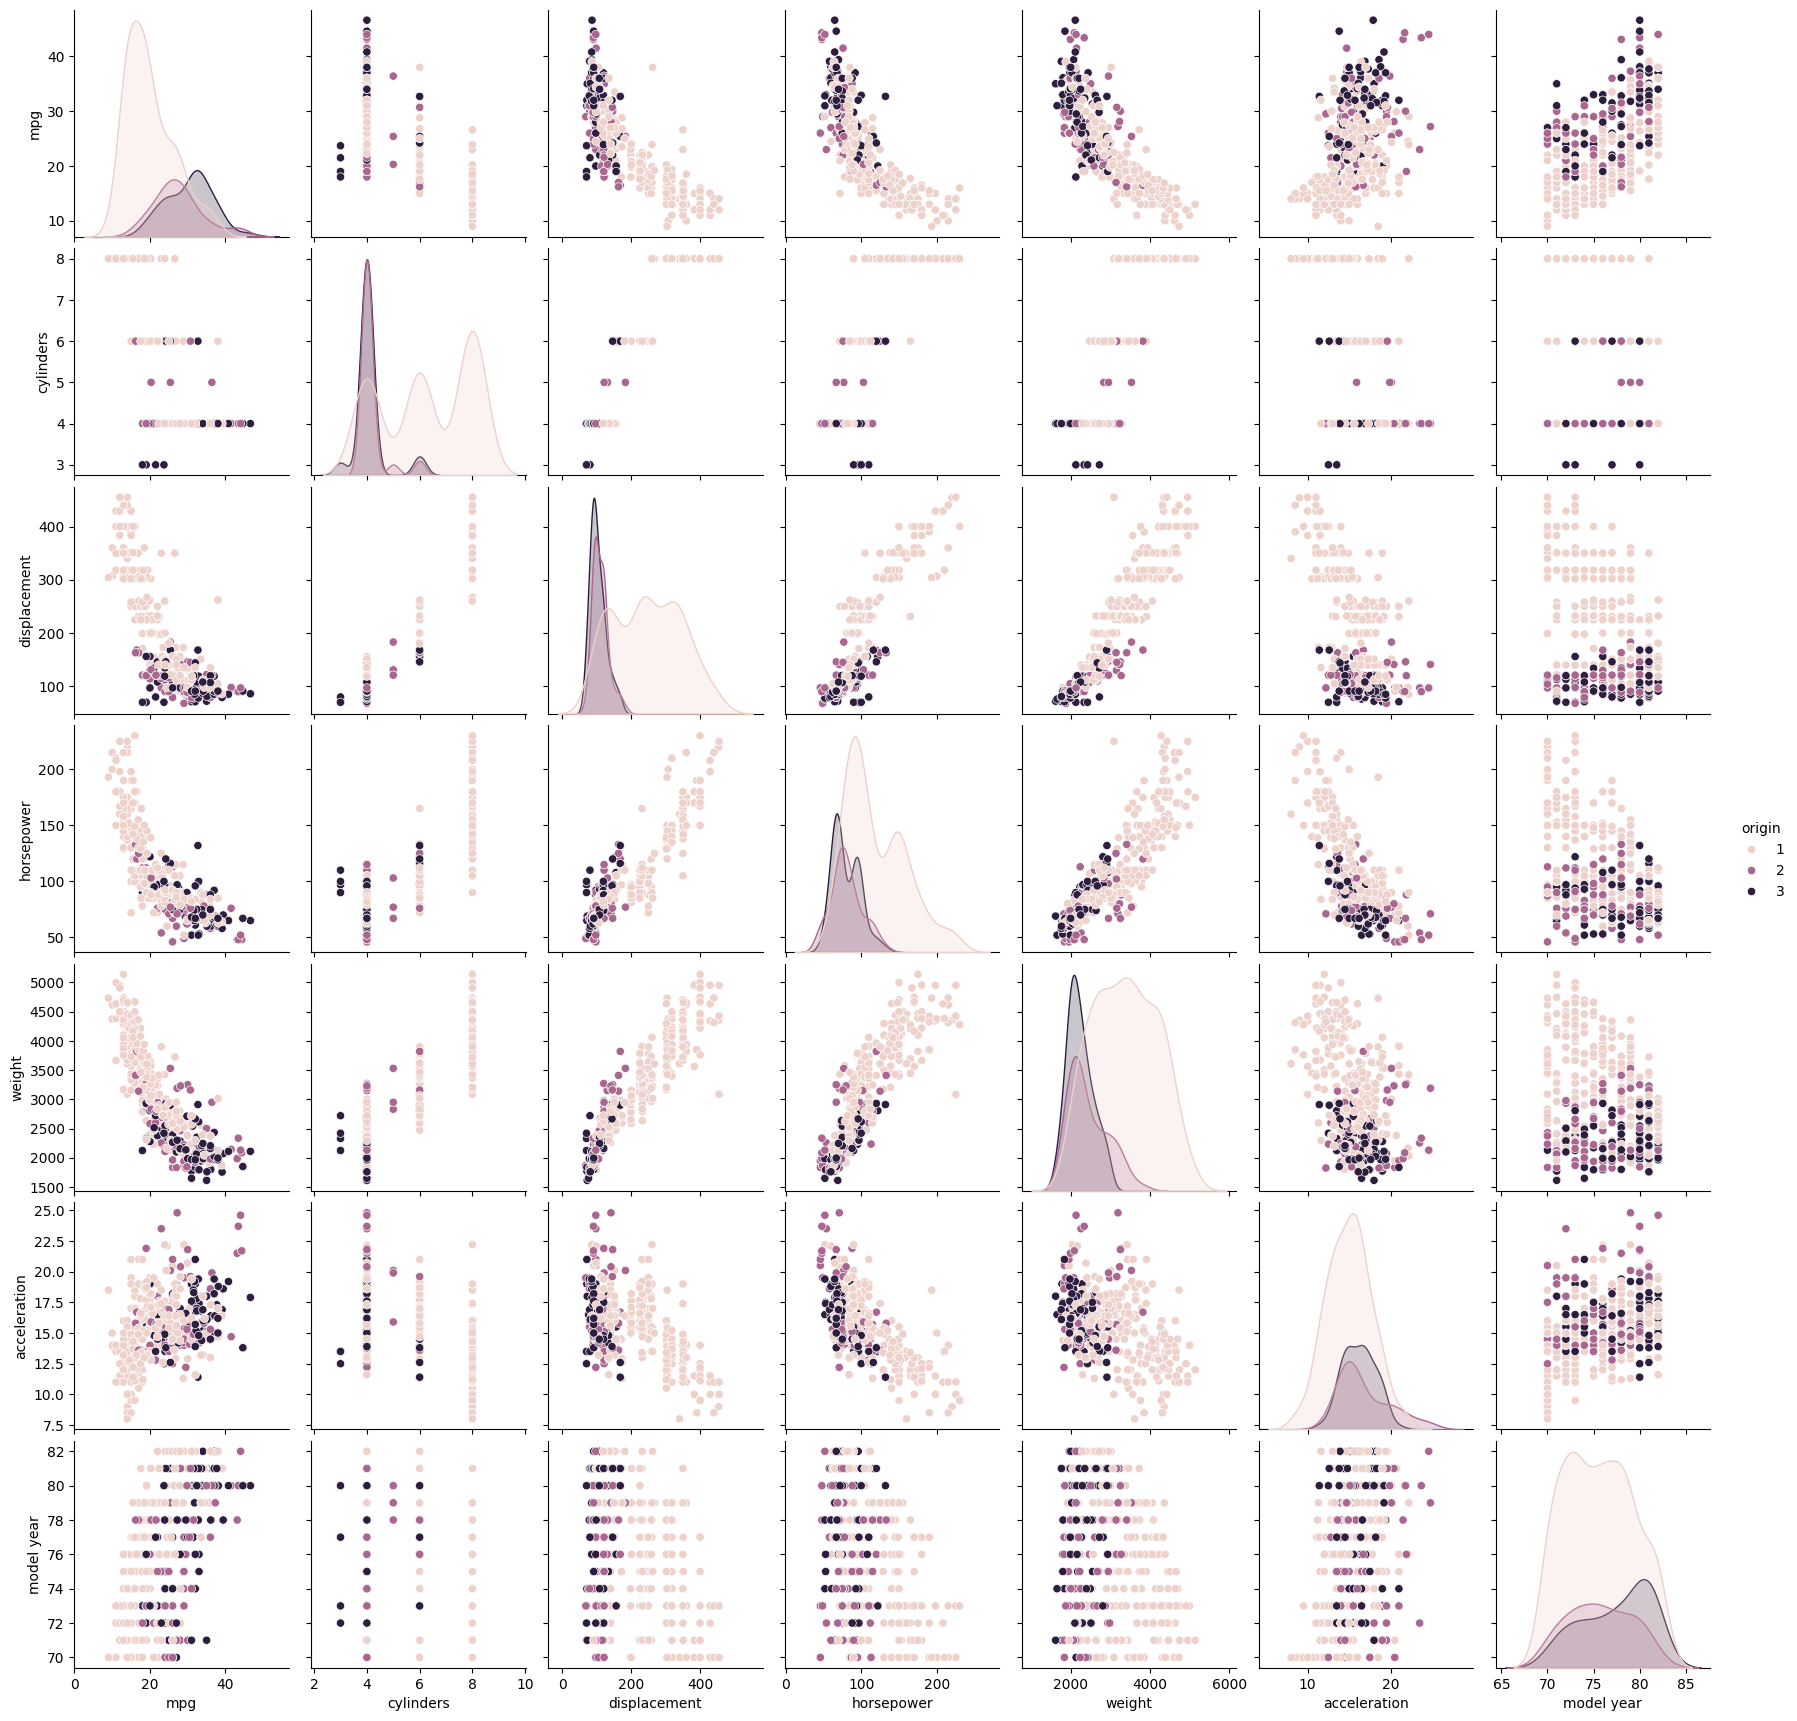

In [11]:
sns.pairplot(df, hue="origin")

grafico de todas as corelações

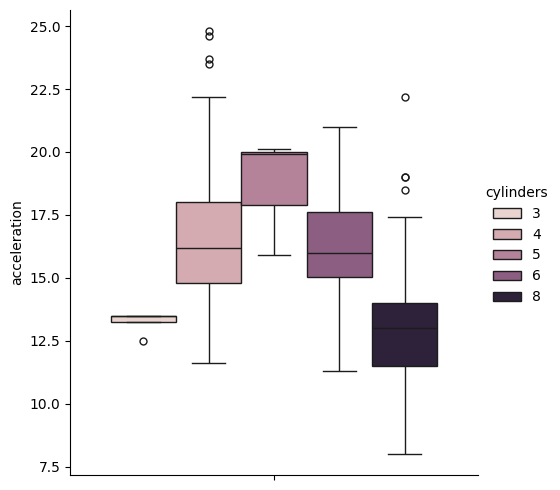

In [12]:
sns.catplot(df, y="acceleration" ,kind="box", hue = "cylinders")

grafico sobre relação de aceleração e numero de cilindros

In [13]:
df.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [14]:
df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

dados estatisticos

In [15]:
y = df["mpg"]
X = df.drop (["mpg","car name"] ,axis=1)

axis = 1 usamos para ele ler as colunas e não as linhas da tabela

separação de treino e teste 



tem um modo que se chama k fold que usamos 5 pastas e colocamos o modelo para treinar a patir dessas pastas, então pegamos a 1 oculatmos, testamos com as outras 4 , depois escondemos a 2 e treinamos com as demais. se chama treino curzado!!! 

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X , y , test_size=0.33 , random_state=42
)

In [18]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(X_train ,y_train)
regr

LinearRegression()

modelo treinado!!

Text(0, 0.5, 'predito')

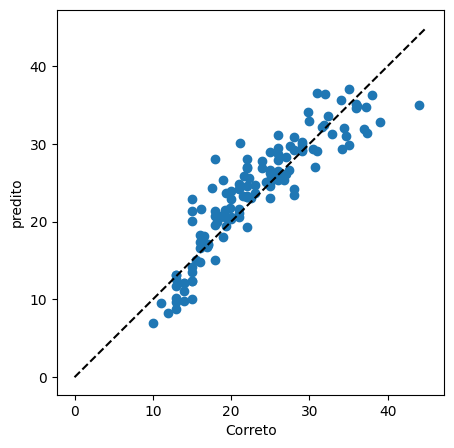

In [26]:
plt.figure(figsize= (5,5))
plt.scatter(y_test , regr.predict(X_test))
plt.plot([0,45],[0,45], ls="--", c="k")
plt.xlabel("Correto")

plt.ylabel("predito")

nesse caso estamos plotando o modelo, assim conseguimos ver se o modelo está correto ou não, 


essa marção no meio seria a marca de um modelo ideial, nesse caso esse molelo está mais ou menos. 
para medir se ele esta bom mesmo, usamos o MSE (midelle squere error)   Onde pegamos o valor do erro ( valor negativo), elevamos ele ao quadrado para virar um valor positivo , então teremos o valor postivo, então no caso de ser -3  o inicial, ele vai para 6 . 


apos tiramos a raiz e ele retorna a ser 3 novamente. 

com isso podemos usar a formula  $\sqrt{\frac{1}{10} \sum_{i=1}^{10} (\hat{y}_i - y_i)^2}$


mas gracas a deus tem uma função pra isso kk 
que está logo a baixo.

com isso temos um modelo que baseado no calculoe na reta , temos que ele erra em média 3.24 galões para mais ou para menos


In [27]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,regr.predict(X_test), squared=False)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3.2418403035673053

from S